<h1> Author :Daity Bhattacharjee
<h2>Task 1 : Prediction using Supervised Machine Learning
<h2>(GRIP @ The Sparks Foundation)<h2>

    
<h6>In this regression task I we will predict the percentage of marks that a student is expected to score, based on the number of hours they studied.<h6>
    

This is a simple linear regression task as it involves just two variables.  

#### STEPS:-

        1. Importing the data and important python libraries
        2. Visualiizing the data
        3. Data Preperation
        4. Model Training 
        5. Plotting the Regression Line
        6. Making Predictions
        7. Comparing the Actual and Predicted Models
        8. Predicted score if a student studies for 9.25 hrs/ day
        9. Evaluating the Model


## STEP-1: IMPORTING THE DATASET AND LIBRARIES

In [3]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [4]:
# Reading data from the provided link

url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [5]:
#EXPLORING THE DATASET

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.shape

(25, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#To check for missing(null) values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## STEP-2:- VISUALIZING THE  DATASET

# Plotting the dataset (Scatterplot for Hours of study vs Percentage of marks obtained)

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()


#### From the Scatterplot above, we observe and conclude that, there is a fairly linear (positively correlated) relationship between "Hours Studied" and "Percentage Scored".
####     Thus we can use a Supervised Machine Learning Model to predict the future values for the given dataset

In [11]:
# To determine the exact correlation between the two variables

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### We conclude that there is a very high positive correlation (0.98 approx) among the two variables, "Hours studied" and "Percentage Scored"

## STEP-3:- DATA PREPERATION

In this step we will seperate the input (Hours denoted as X) and output (Scores denoted as y) data variables. Then we will split the entire dataset into two parts which are "Training Dataset" and "Test Dataset". 

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1:].values

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

## Step- 4:- MODEL TRAINING

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [17]:
# We have splitted our dataset into training and testing datasets

model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

## STEP- 5:- PLOTTING THE REGRESSION LINE

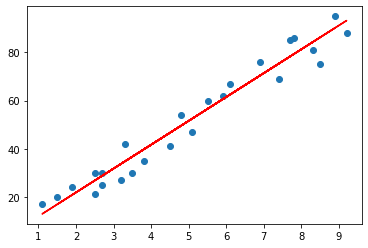

In [18]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

## STEP - 6:- PREDICTING VALUES

Now that we have trained our model, it's time to test the model by making some predictions.

For this we will use our test-set dataset.

In [19]:
# Testing data

print(X_test) #testing data (in hours)

# Model Prediction 

y_pred = model.predict(X_test) #(Predicting the scores)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## STEP 7:- COMPARING THE ACATUAL VS PREDICTED DATA VALUES

In [20]:
from tabulate import tabulate
table=[['Test Value','Predicted Value'],[y_test,y_pred]]
print(tabulate(table))

----------  ---------------
Test Value  Predicted Value
[[20]       [[16.88414476]
 [27]        [33.73226078]
 [69]        [75.357018  ]
 [30]        [26.79480124]
 [62]]       [60.49103328]]
----------  ---------------


## Step 8:- PREDICTED SCORE IF A STUDENT STUDIES 9.25 HRS/DAY?

In [26]:
# Testing the model with our own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The score obtained if a student studies 9.25 hours is:",own_pred)
print("Predicted Score = {}".format(own_pred))

The score obtained if a student studies 9.25 hours is: [[93.69173249]]
Predicted Score = [[93.69173249]]


## STEP 9:- EVALUATING THE MODEL

The final step is to evaluate the performance of the model. 

For this we calculate the different errors and measure the 'Goodness of Fit Parameter',to understand how accurately our model fits the dataset.

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


R2 is known as the goodness of fit measure and it predits how well our model fits the observed dataset. Closer the value of R2 to 1, better the model fits the observed dataset.

  Here our R2 value:0.95 (approx) is close enough to 1, and we can thus predict that our model is an excellent fit to the observed dataset.

## CONCLUSION:-

### Model Fitting and Prediction using Supervised ML was being performed and it was inferred that, the variables "Hours of Studying" and "Test Scores" had a 'high positive correlation', were 'linearly related', and the fitted model predicts the observed dataset quite accurately (in terms of R2 value interpretation). 

### According to the fitted model prediction, the score obtained if a student studies 9.25 hours is: 94 (approx)